In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.shape

(1460, 81)

In [7]:
test_df.shape

(1459, 80)

In [8]:
label_encoders = {}
for col in train_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_df[col] = train_df[col].fillna('Missing')  # fill NaNs for encoding
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

train_df_cleaned = train_df.dropna()  # Drop remaining NaNs (if any in numeric cols)


<Axes: >

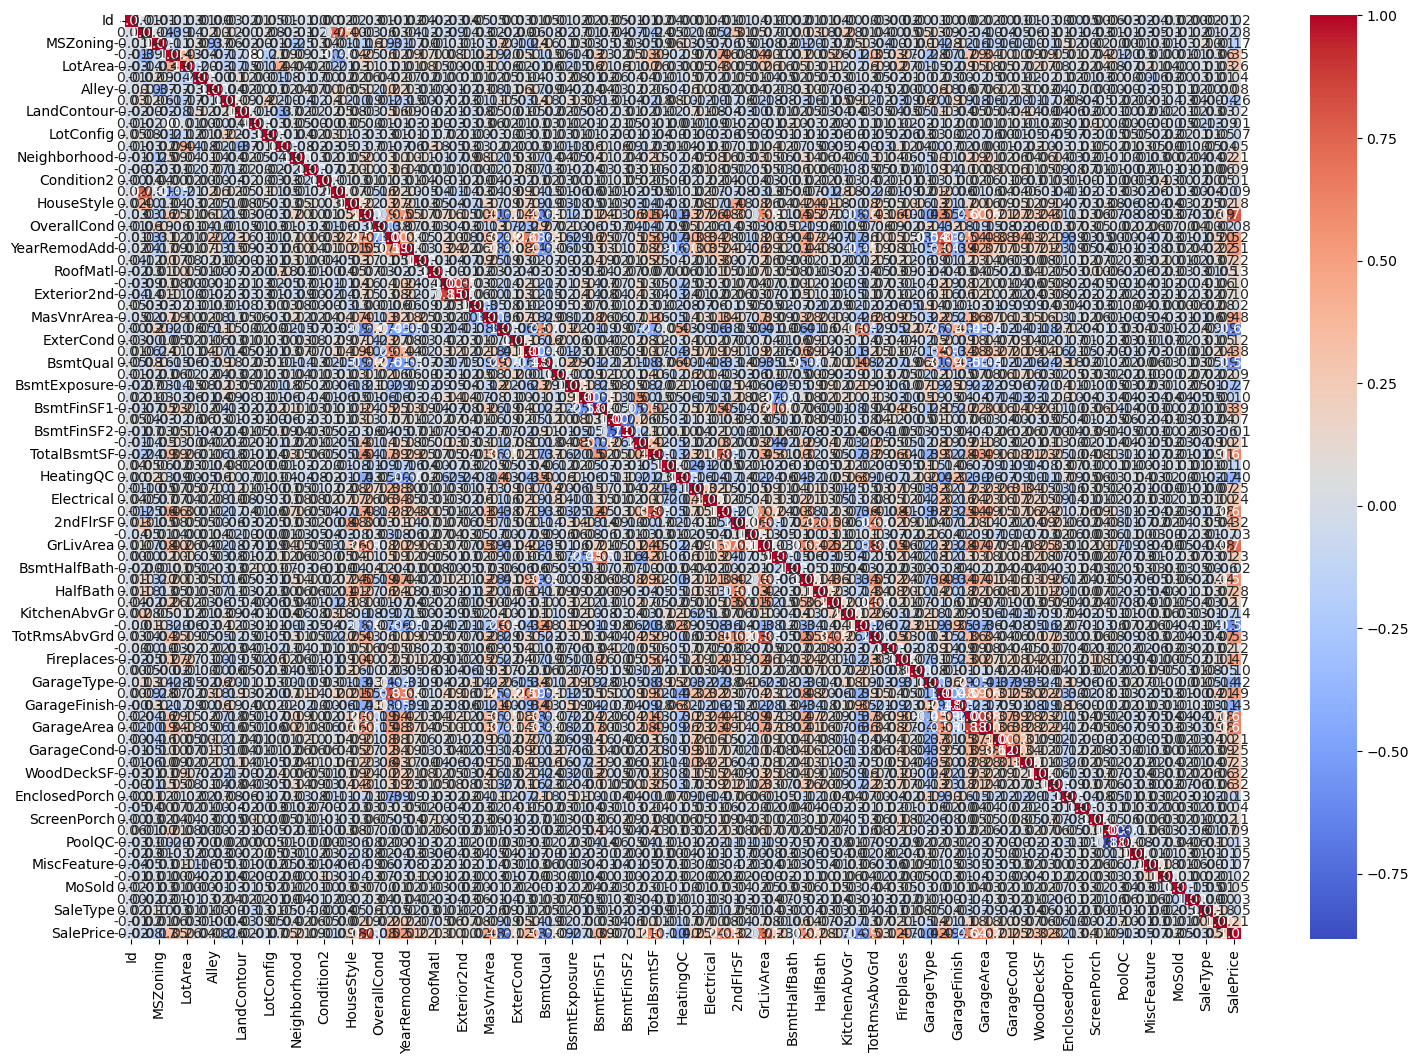

In [9]:
corr = train_df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')

In [10]:
train_df.dtypes[train_df.dtypes == 'object']


Series([], dtype: object)

In [11]:
features=['SaleCondition','SalePrice','LotFrontage','LotArea']

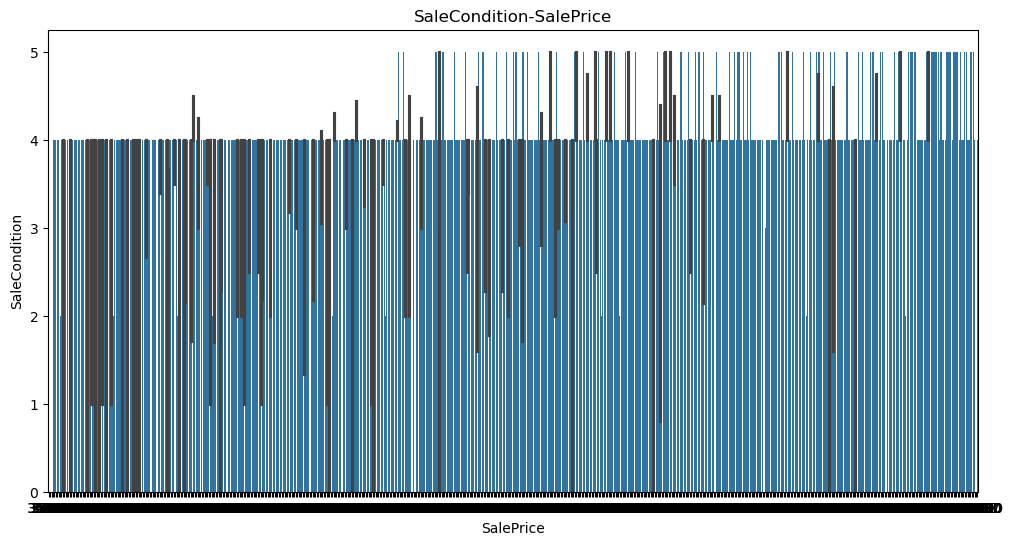

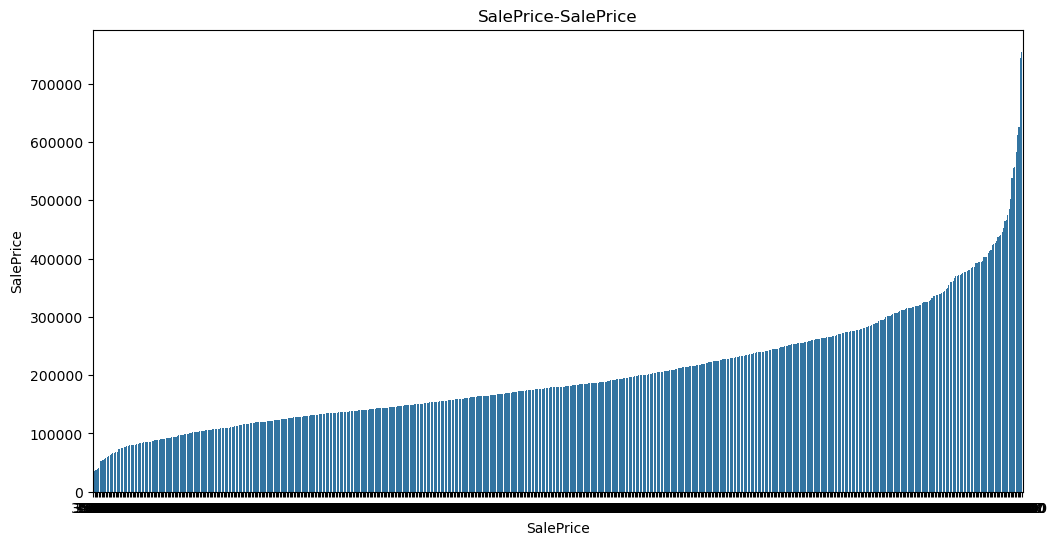

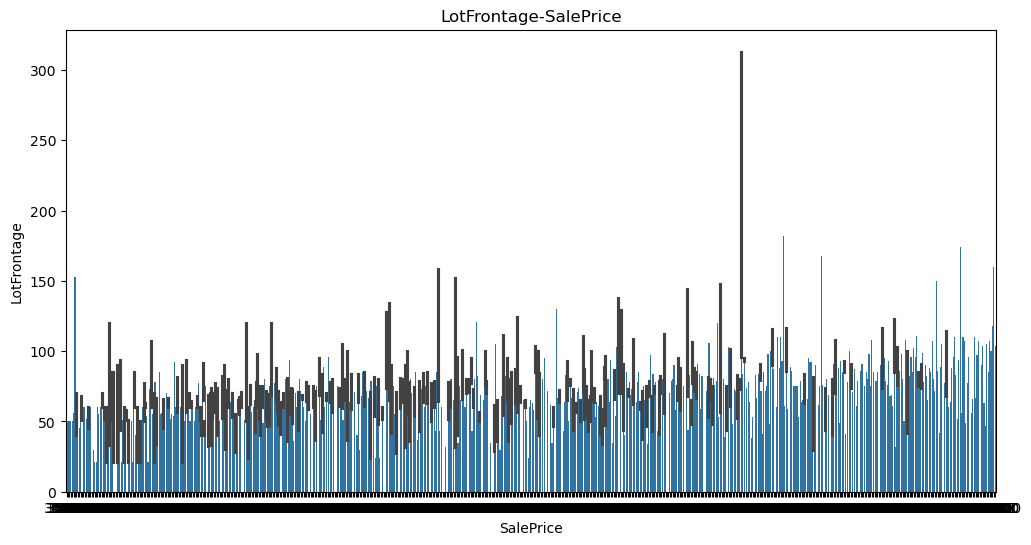

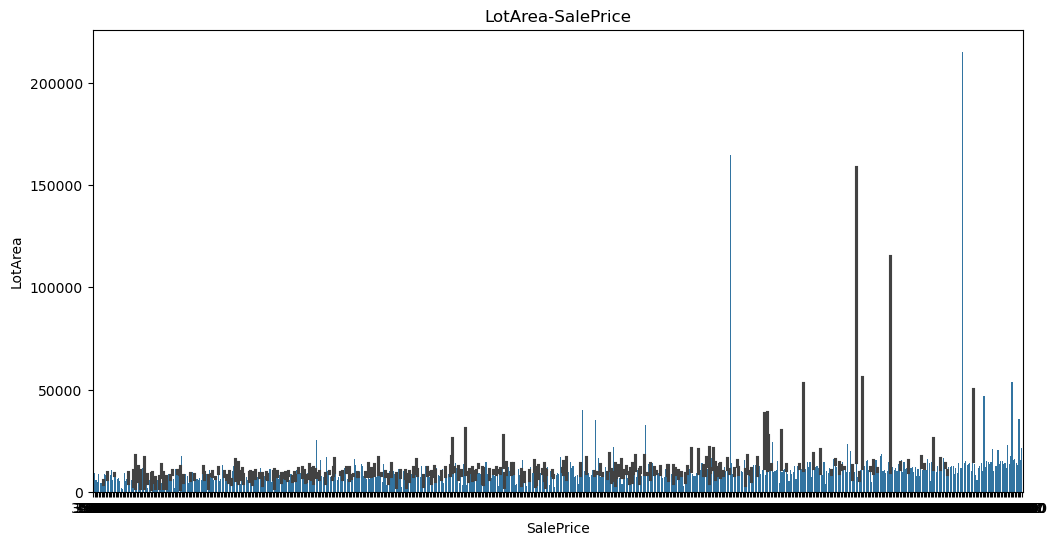

In [12]:
for i in features:
    fig,ax=plt.subplots(figsize=(12,6))
    sns.barplot(train_df,x='SalePrice', y=i)
    plt.title(f'{i}-SalePrice')

In [13]:
y_train=train_df['SalePrice']
x_train=train_df.drop('SalePrice',axis=1)

In [14]:
x_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,0,3,2,1,0,2,2008,8,4
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,0,3,2,1,0,5,2007,8,4
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,0,3,2,1,0,9,2008,8,4
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,0,3,2,1,0,2,2006,8,0
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,0,3,2,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,0,0,3,2,1,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,0,0,3,3,1,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,1,3,3,0,...,0,0,3,0,3,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,0,0,3,2,1,0,4,2010,8,4


In [15]:
train_df_cleaned.loc[:, 'PriceCategory'] = pd.qcut(train_df_cleaned['SalePrice'], q=3, labels=['Low', 'Medium', 'High'])


C:\Users\HP\AppData\Local\Temp\ipykernel_8428\142781200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned.loc[:, 'PriceCategory'] = pd.qcut(train_df_cleaned['SalePrice'], q=3, labels=['Low', 'Medium', 'High'])


In [16]:
x = train_df_cleaned.drop(["SalePrice","PriceCategory"], axis=1)
y = train_df_cleaned["PriceCategory"]


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [42]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}


grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Accuracy: 0.3616076970825574


In [38]:
y_train.value_counts()


PriceCategory
Low       324
High      292
Medium    280
Name: count, dtype: int64

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

        High       0.91      0.84      0.87        81
         Low       0.74      0.84      0.78        61
      Medium       0.72      0.70      0.71        83

    accuracy                           0.79       225
   macro avg       0.79      0.79      0.79       225
weighted avg       0.79      0.79      0.79       225

